# AutoEncoders :

1. A Neural Network that is used to reduce the dimensionality of data.
2. Has the same architecture as an MLP.
3. An AutoEncoder consist of same number of neurons in the input and output layer with some hidden layers.

Useful applications of AutoEncoders :

1. Data Denoising.
2. Dimensionality Reduction for data visualization.

An AutoEncoder consists of two parts one is the encoder which is used to compress the data and the other is decoder used to decompress the data.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("FFNN/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting FFNN/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting FFNN/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting FFNN/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting FFNN/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Building AutoEncoders :

In [0]:
# Parameters to be used..
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 128

In [0]:
X = tf.placeholder(tf.float32, [None, n_input]) # PlaceHolder for X

### AutoEncoder:

In [0]:
weights = {
    'enc_1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'enc_2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'dec_1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'dec_2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_1])),
    'b4': tf.Variable(tf.random_normal([n_input]))
}

In [0]:
def AutoOne(X, weights, biases):
    encoder_in = tf.nn.sigmoid(tf.add(tf.matmul(X, weights['enc_1']), biases['b1']))
    encoder_out = tf.nn.sigmoid(tf.add(tf.matmul(encoder_in, weights['enc_2']), biases['b2']))
    decoder_in = tf.nn.sigmoid(tf.add(tf.matmul(encoder_out, weights['dec_1']), biases['b3']))
    decoder_out = tf.nn.sigmoid(tf.add(tf.matmul(decoder_in, weights['dec_2']), biases['b4']))
    return decoder_out

In [0]:
y_pred = AutoOne(X, weights, biases)

In [0]:
y_true = X

In [0]:
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))

In [0]:
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)

Epoch  1 : Cost : 0.082940
Epoch  2 : Cost : 0.073728
Epoch  3 : Cost : 0.067570
Epoch  4 : Cost : 0.065079
Epoch  5 : Cost : 0.060840
Epoch  6 : Cost : 0.058333
Epoch  7 : Cost : 0.061137
Epoch  8 : Cost : 0.057846
Epoch  9 : Cost : 0.055524
Epoch 10 : Cost : 0.054424
Epoch 11 : Cost : 0.053886
Epoch 12 : Cost : 0.052891
Epoch 13 : Cost : 0.052182
Epoch 14 : Cost : 0.050875
Epoch 15 : Cost : 0.048766
Epoch 16 : Cost : 0.047725
Epoch 17 : Cost : 0.049602
Epoch 18 : Cost : 0.049515
Epoch 19 : Cost : 0.047751
Epoch 20 : Cost : 0.045852
Optimization Finished!


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


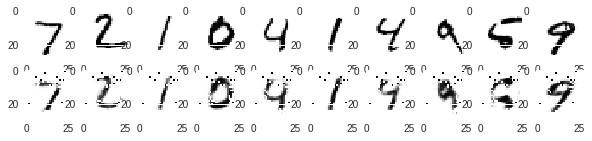

In [11]:
with tf.Session(config = tf.ConfigProto(log_device_placement = True)) as sess:
    tf.global_variables_initializer().run()
    total_batch = int(mnist.train.num_examples/batch_size)
    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _,c = sess.run([optimizer, cost], feed_dict={X:batch_xs})
        if epoch % display_step == 0:
            print("Epoch {:2d} :".format(epoch+1), "Cost : {:.6f}".format(c))
    print("Optimization Finished!")
    
    # Checking the quality of image generated after compressing it then decompressing it.

    encode_decode = sess.run(y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    f.show()
    plt.draw()
    plt.show()

### Denoising AutoEncoder :

> To increase the robustness of autoencoders some noise is added to in the encoder phase, while the original images are used as targets.

> A denoising AutoEncoders does two things - First is to encode the image in a way so as to preserve relevant information, second - it seeks to nullify the effect of distortion applied to the same input.

In [0]:
n_input    = 784
n_hidden_1 = 1024
n_hidden_2 = 2048
n_output   = 784

In [0]:
epochs     = 100
batch_size = 100
disp_step  = 10

In [0]:
trainimg   = mnist.train.images
trainlabel = mnist.train.labels
testimg    = mnist.test.images
testlabel  = mnist.test.labels

In [0]:
X = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

In [0]:
# to reduce overfitting apply dropout..
dropout_keep_prob = tf.placeholder(tf.float32)

In [0]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_output]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_output]))
}

In [0]:
def Denoising_AutoEncoder(X, y, weights, biases):
    encode_in = tf.nn.sigmoid(tf.add(tf.matmul(X, weights['h1']), biases['b1']))
    encode_out = tf.nn.dropout(encode_in, dropout_keep_prob)
    
    decode_in = tf.nn.sigmoid(tf.add(tf.matmul(encode_out, weights['h2']), biases['b2']))
    decode_out = tf.nn.dropout(decode_in, dropout_keep_prob)
    
    output = tf.nn.sigmoid(tf.matmul(decode_out, weights['out']) + biases['out'])
    
    return output

In [0]:
y_pred = Denoising_AutoEncoder(X, y, weights, biases)

In [0]:
cost = tf.reduce_mean(tf.pow(y_pred - y, 2))

In [0]:
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)

In [0]:
def plotresult(org_vec,noisy_vec,out_vec):
    plt.matshow(np.reshape(org_vec, (28, 28)), cmap=plt.get_cmap('gray'))
    plt.title("Original Image")
    plt.colorbar()

    plt.matshow(np.reshape(noisy_vec, (28, 28)), cmap=plt.get_cmap('gray'))
    plt.title("Input Image")
    plt.colorbar()
    
    outimg = np.reshape(out_vec, (28, 28))
    plt.matshow(outimg, cmap=plt.get_cmap('gray'))
    plt.title("Reconstructed Image")
    plt.colorbar()
    plt.show()

Epoch 00/100 average cost: 0.107157
Test label is 9


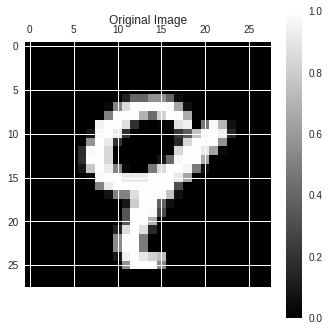

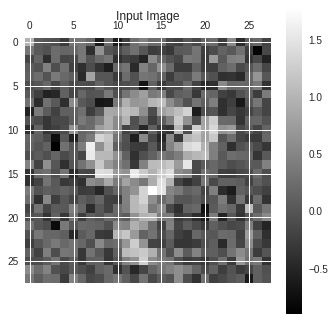

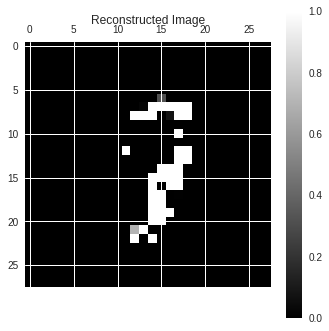

Epoch 10/100 average cost: 0.081144
Test label is 9


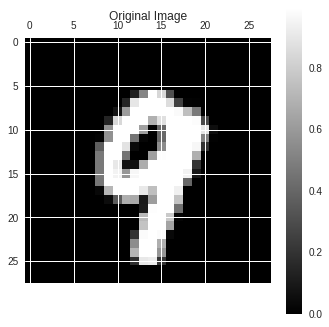

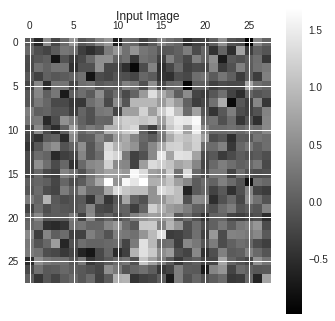

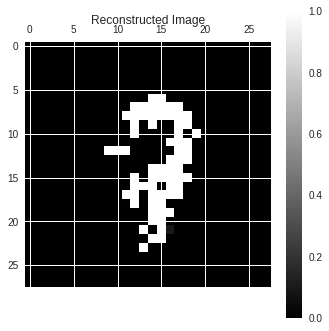

Epoch 20/100 average cost: 0.076121
Test label is 3


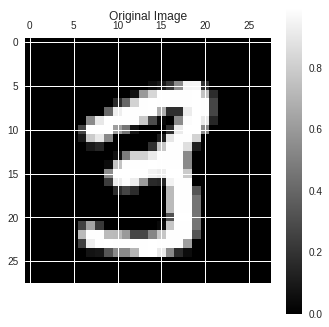

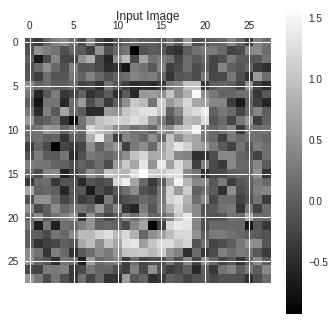

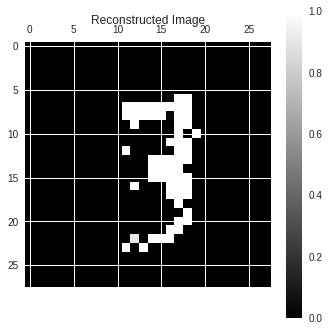

Epoch 30/100 average cost: 0.074689
Test label is 3


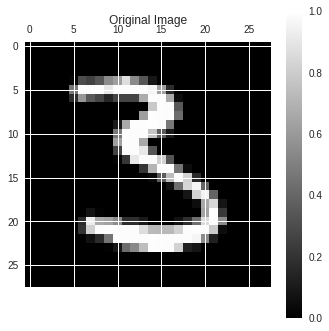

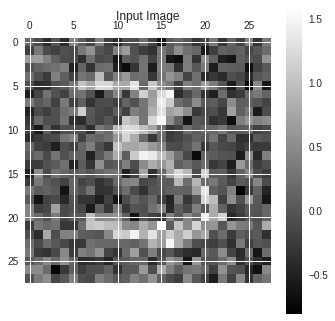

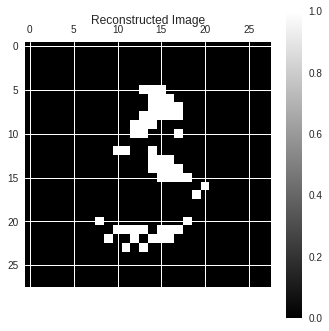

Epoch 40/100 average cost: 0.073264
Test label is 3


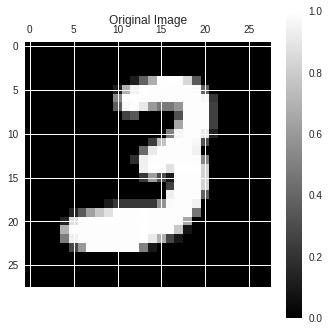

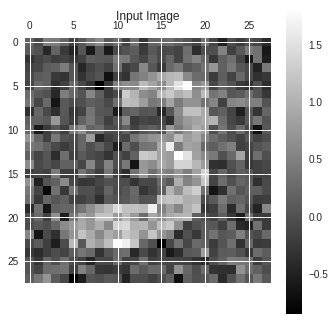

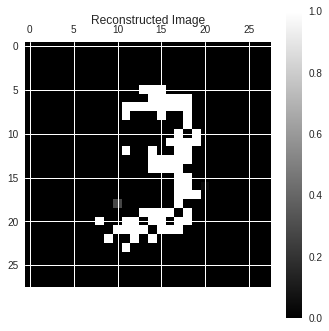

Epoch 50/100 average cost: 0.072083
Test label is 2


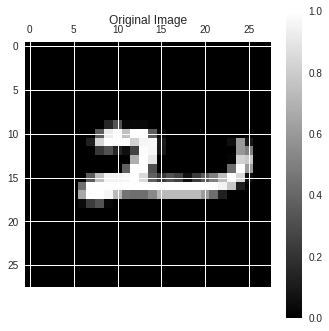

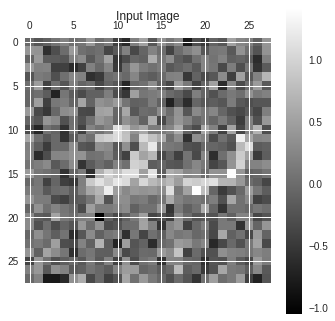

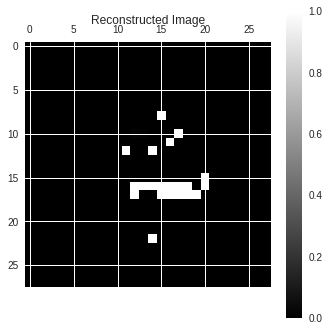

Epoch 60/100 average cost: 0.071384
Test label is 1


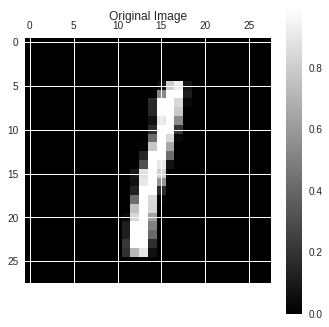

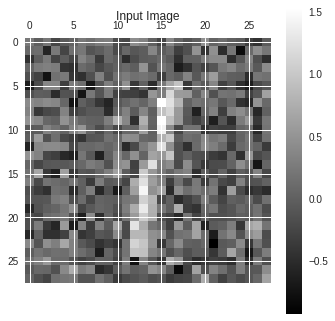

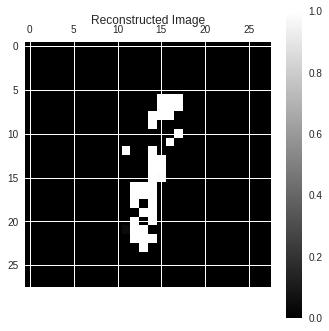

Epoch 70/100 average cost: 0.070414
Test label is 4


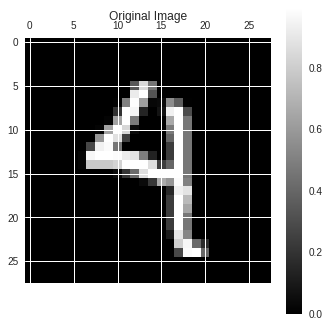

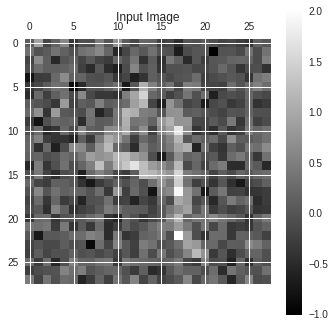

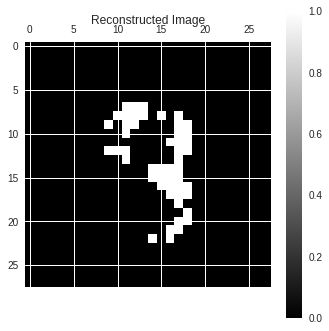

Epoch 80/100 average cost: 0.070219
Test label is 9


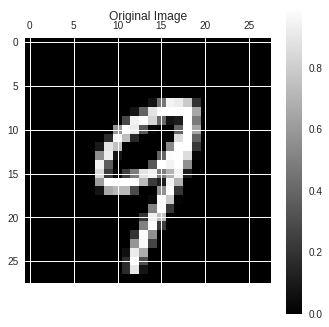

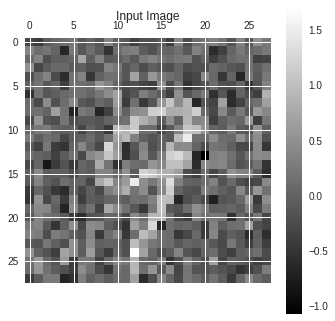

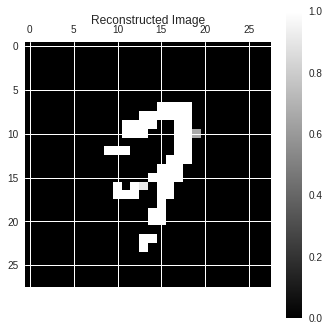

Epoch 90/100 average cost: 0.070008
Test label is 3


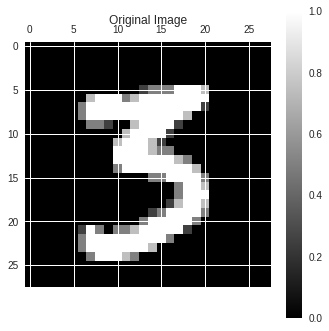

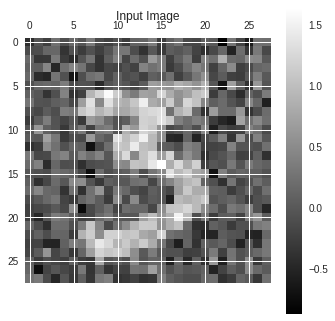

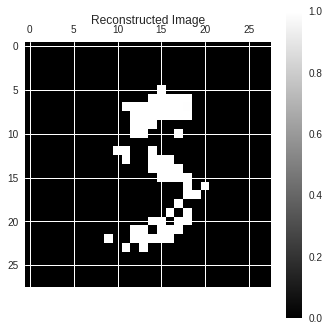

In [24]:
with tf.Session(config = tf.ConfigProto(log_device_placement = True)) as sess:
    tf.global_variables_initializer().run()
    for epoch in range(epochs):
        num_batch  = int(mnist.train.num_examples/batch_size)
        total_cost = 0.
        for i in range(num_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Add noise to batches :
            batch_xs_noisy = batch_xs + 0.3*np.random.randn(batch_size, 784)
            feeds = {X: batch_xs_noisy, y: batch_xs, dropout_keep_prob: 0.8}
            sess.run(optimizer, feed_dict=feeds)
            total_cost += sess.run(cost, feed_dict=feeds)
        
        if epoch % disp_step == 0:
            print("Epoch %02d/%02d average cost: %.6f" % (epoch, epochs, total_cost/num_batch))
    
            randidx   = np.random.randint(testimg.shape[0], size=1)
            orgvec    = testimg[randidx, :]
            testvec   = testimg[randidx, :]
            label     = np.argmax(testlabel[randidx, :], 1)
            print("Test label is %d" % (label))
            noisyvec = testvec + 0.3*np.random.randn(1, 784)        
            outvec = sess.run(y_pred, feed_dict={X: noisyvec, dropout_keep_prob: 1})
            plotresult(orgvec,noisyvec,outvec)

### Convolutional AutoEncoder:

In [0]:
def plotresult(org_vec,noisy_vec,out_vec):
    plt.matshow(np.reshape(org_vec, (28, 28)), cmap=plt.get_cmap('gray'))
    plt.title("Original Image")
    plt.colorbar()

    plt.matshow(np.reshape(noisy_vec, (28, 28)), cmap=plt.get_cmap('gray'))
    plt.title("Input Image")
    plt.colorbar()
    
    outimg = np.reshape(out_vec, (28, 28))
    plt.matshow(outimg, cmap=plt.get_cmap('gray'))
    plt.title("Reconstructed Image")
    plt.colorbar()
    plt.show()

In [0]:
n_input = 784
n_hidden_1 = 256 
n_hidden_2 = 256 
n_output = 784

epochs = 110
batch_size = 100
disp_step = 10

In [0]:
trainimg   = mnist.train.images
trainlabel = mnist.train.labels
testimg    = mnist.test.images
testlabel  = mnist.test.labels

In [0]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_output])
dropout_keep_prob = tf.placeholder("float")

In [0]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_output]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_output]))
}

In [0]:
encode_in = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
encode_out = tf.nn.dropout(encode_in, dropout_keep_prob)
decode_in = tf.nn.sigmoid(tf.add(tf.matmul(encode_out, weights['h2']), biases['b2']))
decode_out = tf.nn.dropout(decode_in, dropout_keep_prob)

In [0]:
y_pred = tf.nn.sigmoid(tf.matmul(decode_out, weights['out']) + biases['out'])

# COST
cost = tf.reduce_mean(tf.pow(y_pred - y, 2))


In [0]:
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)

Start Training
Epoch 00/110 average cost: 0.092336
Start Test
Test label is 4


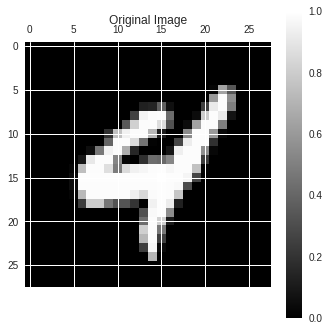

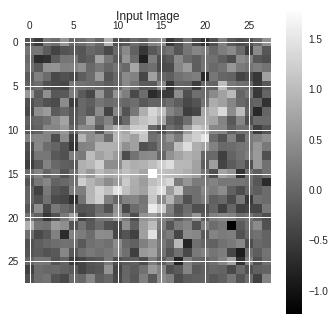

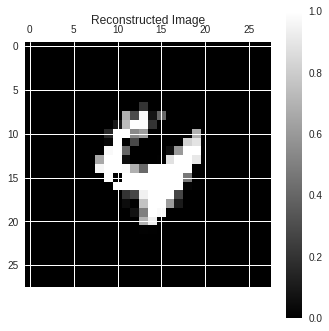

restart Training
Epoch 10/110 average cost: 0.024109
Start Test
Test label is 3


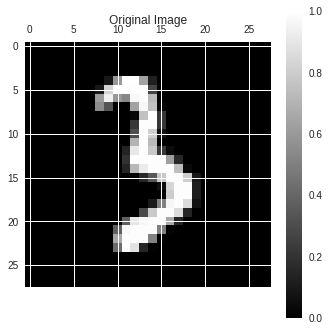

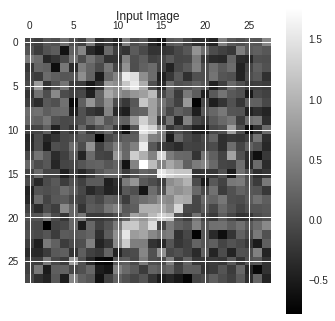

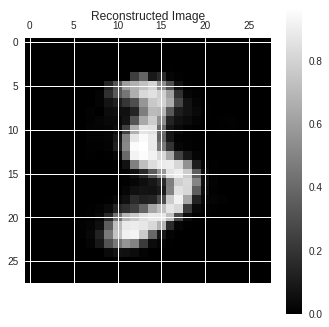

restart Training
Epoch 20/110 average cost: 0.021215
Start Test
Test label is 6


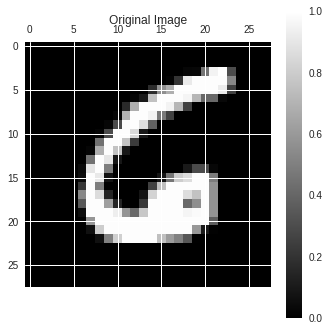

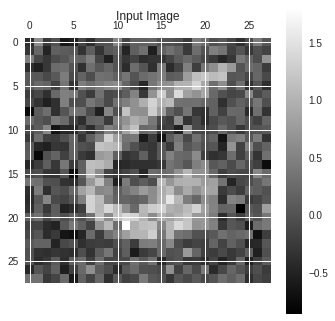

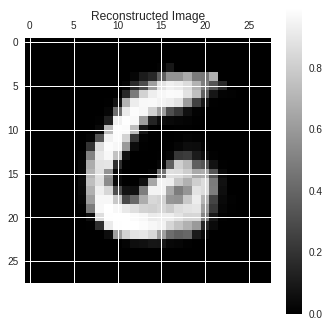

restart Training
Epoch 30/110 average cost: 0.020103
Start Test
Test label is 7


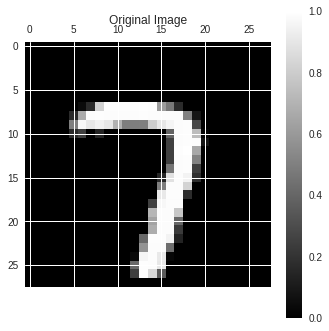

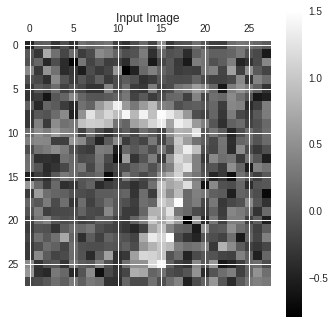

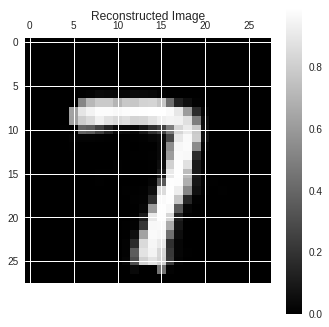

restart Training
Epoch 40/110 average cost: 0.019255
Start Test
Test label is 5


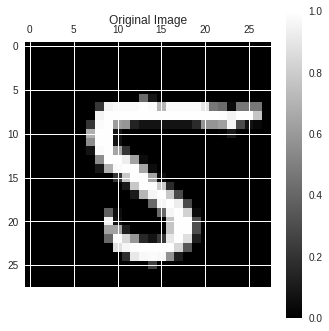

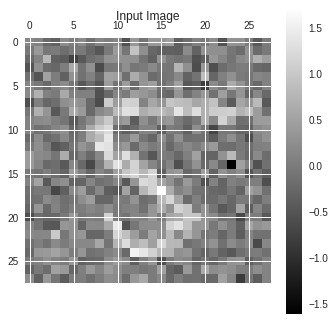

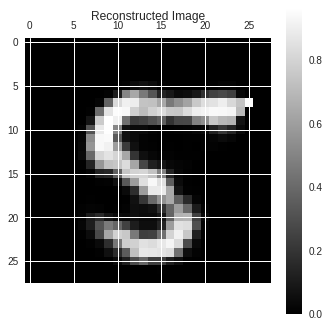

restart Training
Epoch 50/110 average cost: 0.018683
Start Test
Test label is 4


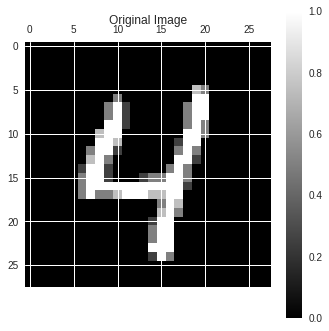

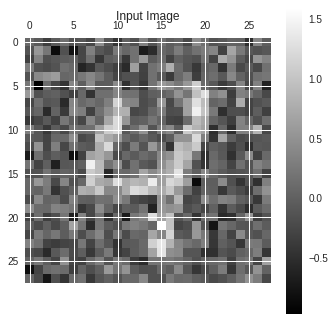

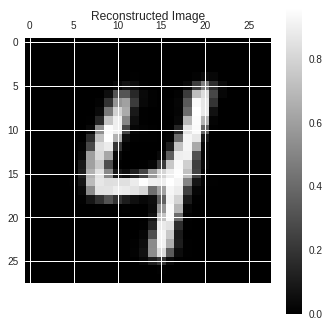

restart Training
Epoch 60/110 average cost: 0.018238
Start Test
Test label is 7


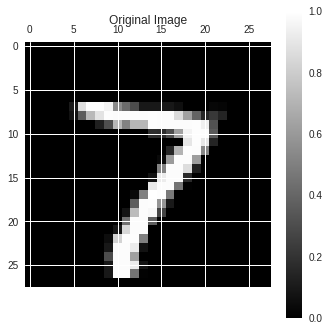

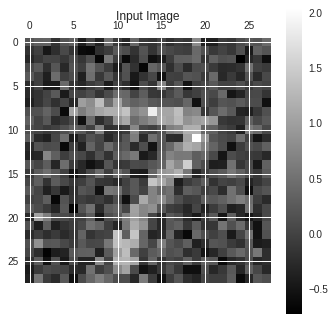

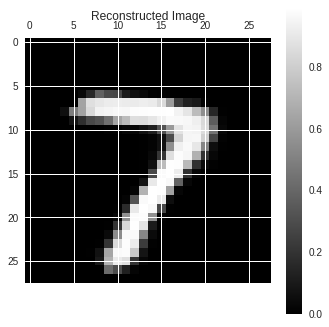

restart Training
Epoch 70/110 average cost: 0.017829
Start Test
Test label is 8


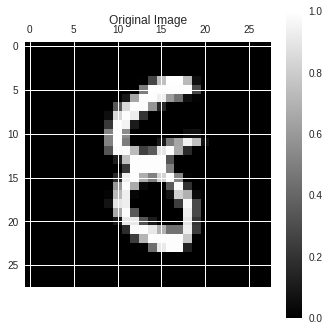

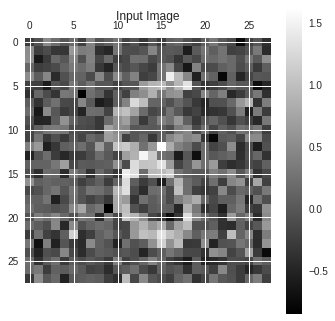

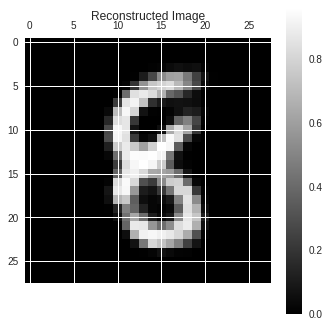

restart Training
Epoch 80/110 average cost: 0.017499
Start Test
Test label is 9


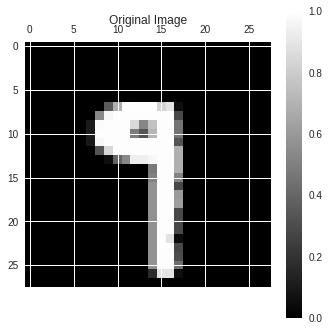

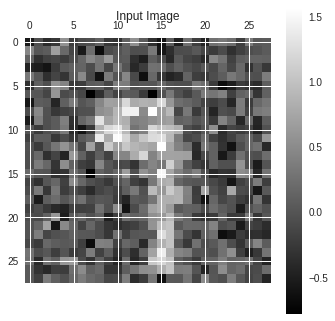

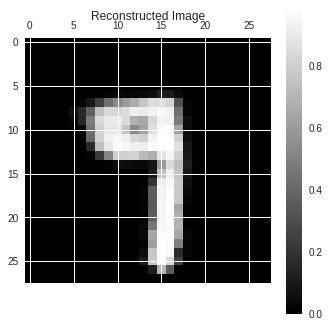

restart Training
Epoch 90/110 average cost: 0.017262
Start Test
Test label is 7


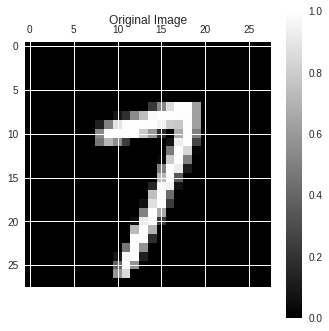

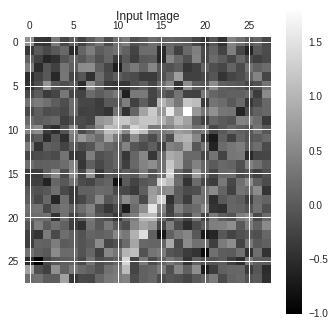

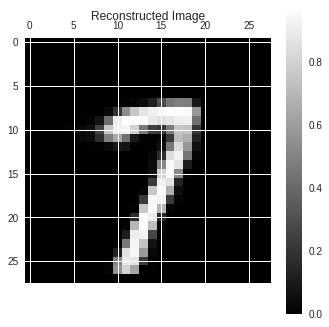

restart Training
Epoch 100/110 average cost: 0.017081
Start Test
Test label is 9


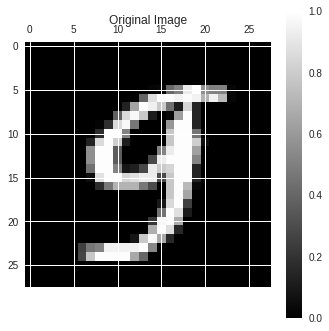

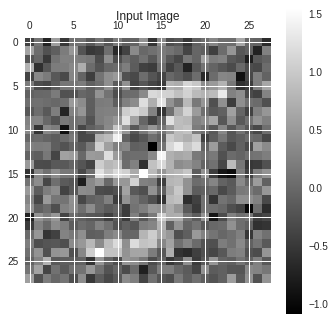

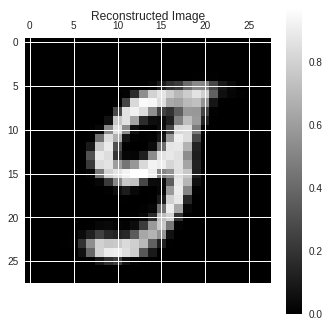

restart Training


In [44]:
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    print("Start Training")
    for epoch in range(epochs):
        num_batch  = int(mnist.train.num_examples/batch_size)
        total_cost = 0.
        for i in range(num_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            batch_xs_noisy = batch_xs + 0.3*np.random.randn(batch_size, 784)
            feeds = {x: batch_xs_noisy, y: batch_xs, dropout_keep_prob: 0.8}
            sess.run(optimizer, feed_dict=feeds)
            total_cost += sess.run(cost, feed_dict=feeds)
        # DISPLAY
        if epoch % disp_step == 0:
            print("Epoch %02d/%02d average cost: %.6f" % (epoch, epochs, total_cost/num_batch))

            # Test one
            print ("Start Test")
            randidx = np.random.randint(testimg.shape[0], size=1)
            orgvec = testimg[randidx, :]
            testvec = testimg[randidx, :]
            label = np.argmax(testlabel[randidx, :], 1)

            print ("Test label is %d" % label)
            noisyvec = testvec + 0.3*np.random.randn(1, 784)
            outvec = sess.run(y_pred, feed_dict={x: noisyvec, dropout_keep_prob: 1})

            plotresult(orgvec,noisyvec,outvec)
            print("restart Training")